## matplotlibを活用した可視化方法を整理
* オブジェクト指向で実装してみた
参考記事：[URL](https://qiita.com/skotaro/items/08dc0b8c5704c94eafb9)

In [1]:
%load_ext lab_black

In [2]:
# ライブラリーのインストール
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

from pandas.plotting import *
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
import seaborn as sns

import os

#### データの読み込み

In [3]:
file_path = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
)
file_name = os.path.splitext(os.path.basename(file_path))[0]
column_names = [
    "MPG",
    "Cylinders",
    "Displacement",
    "Horsepower",
    "Weight",
    "Acceleration",
    "Model Year",
    "Origin",
]

In [4]:
df = pd.read_csv(
    file_path,  # ファイルパス
    names=column_names,  # 列名を指定
    na_values="?",  # ?は欠損値として読み込む
    comment="\t",  # TAB以降右はスキップ
    sep=" ",  # 空白行を区切りとする
    skipinitialspace=True,  # カンマの後の空白をスキップ
    encoding="utf-8",
)
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


#### 棒グラフ

In [5]:
df_year = df.groupby(["Model Year"])["Displacement"].sum().reset_index()
df_year["Displacement"] = df_year["Displacement"]
df_year.head()

,Model Year,Displacement
0,70,8161.0
1,71,5873.0
2,72,6114.5
3,73,10275.0
4,74,4637.0


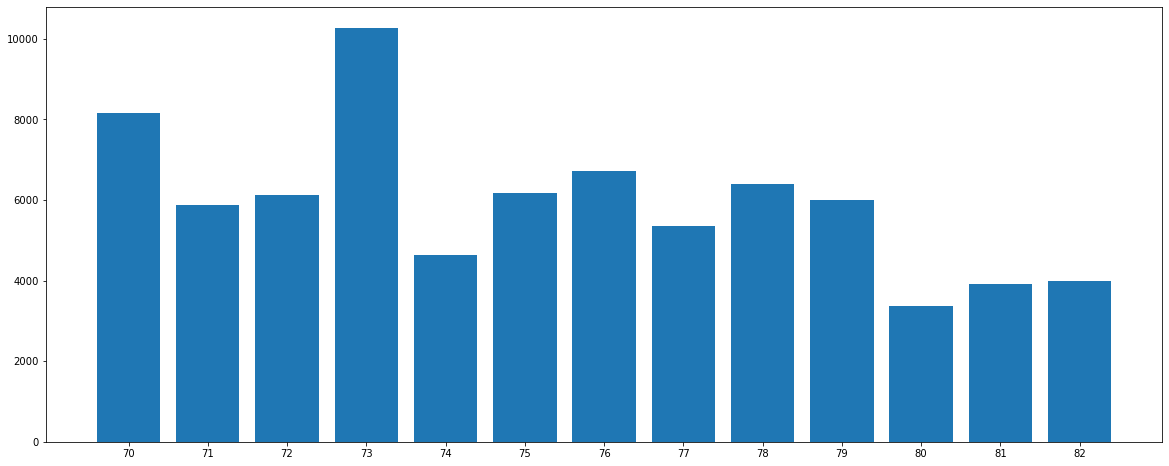

In [6]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, xticks=df_year["Model Year"])
ax.bar(df_year["Model Year"], df_year["Displacement"])
plt.show()

#### 軸に名前を付ける

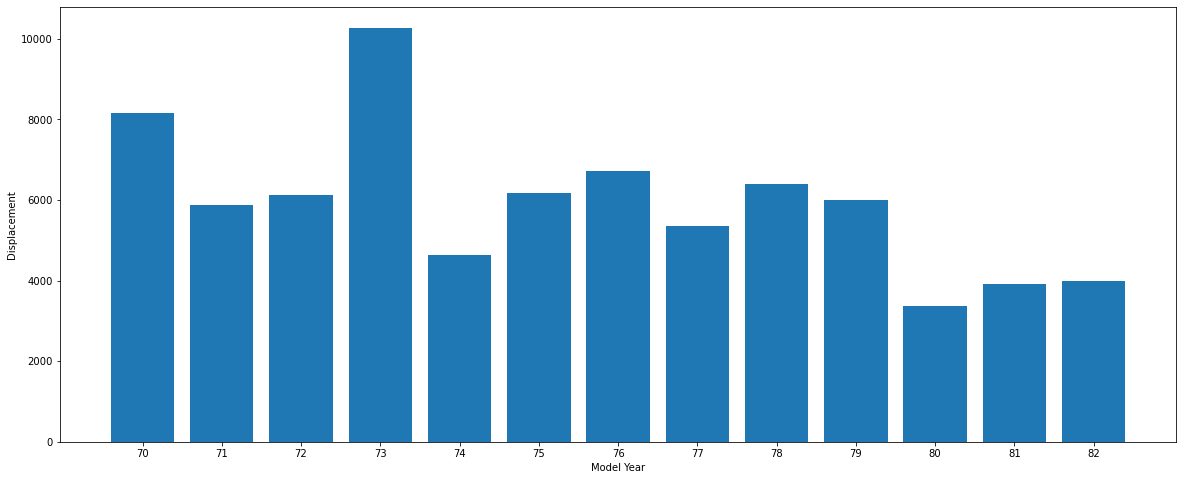

In [7]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(
    111, xlabel="Model Year", ylabel="Displacement", xticks=df_year["Model Year"]
)
ax.bar(df_year["Model Year"], df_year["Displacement"])

# set_xlabel, set_ylabelで設定してもOK
# ax.set_xlabel('Model Year', fontproperties=font, fontsize=20)
# ax.set_ylabel('Displacement', fontproperties=font, fontsize=20)
plt.show()

#### 軸の文字を大きくする

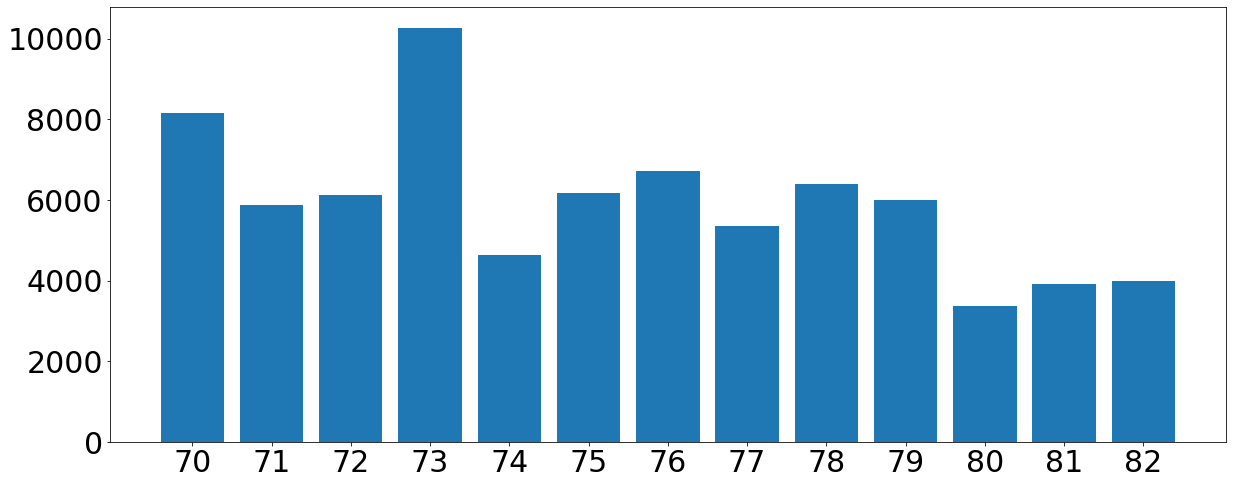

In [8]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, xticks=df_year["Model Year"])
ax.bar(df_year["Model Year"], df_year["Displacement"])

# tick_paramsで設定
ax.tick_params(axis="x", labelsize=30)
ax.tick_params(axis="y", labelsize=30)
ax.ticklabel_format(axis="y", style="plain")
plt.show()

#### 軸の色を変える

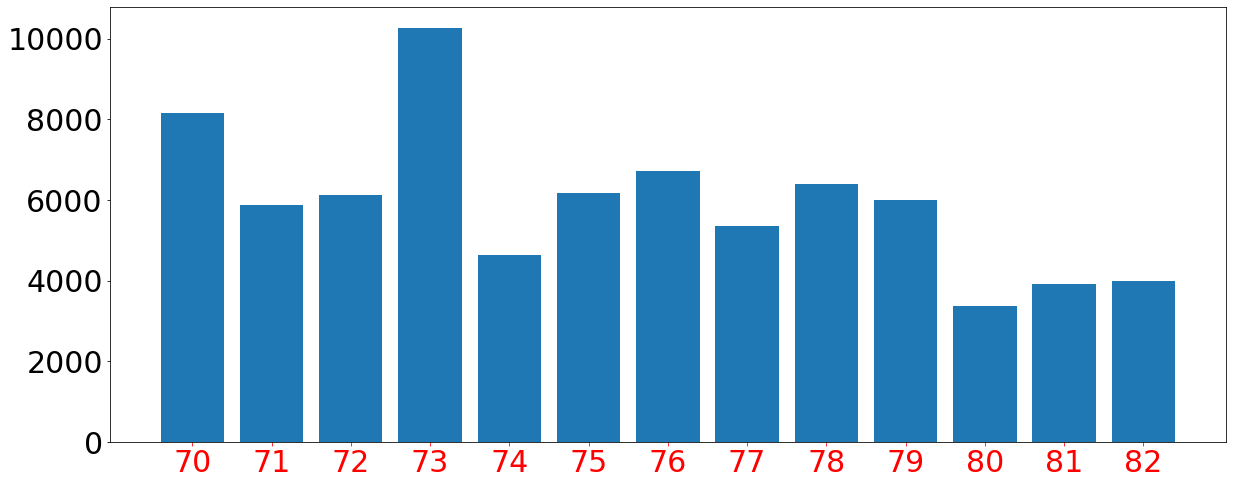

In [9]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, xticks=df_year["Model Year"])
ax.bar(df_year["Model Year"], df_year["Displacement"])

# tick_paramsで設定
ax.tick_params(axis="x", labelsize=30, colors="red")
ax.tick_params(axis="y", labelsize=30)
ax.ticklabel_format(axis="y", style="plain")
plt.show()

#### 棒グラフの上に数字を追加

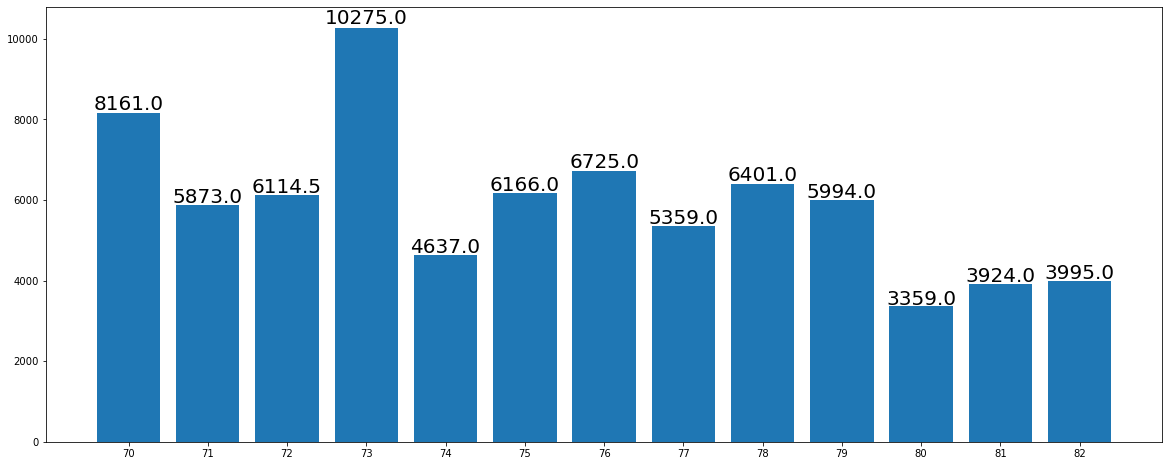

In [10]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, xticks=df_year["Model Year"])
ax.bar(df_year["Model Year"], df_year["Displacement"])

# 棒グラフの上に数字を追加
for i in range(len(df_year)):
    ax.text(
        x=df_year["Model Year"][i],
        y=df_year["Displacement"][i] + (df_year["Displacement"][i]) / 100,
        s=df_year["Displacement"][i],
        horizontalalignment="center",
        size=20,
    )
plt.show()

#### ヒストグラム

#### matplotlib

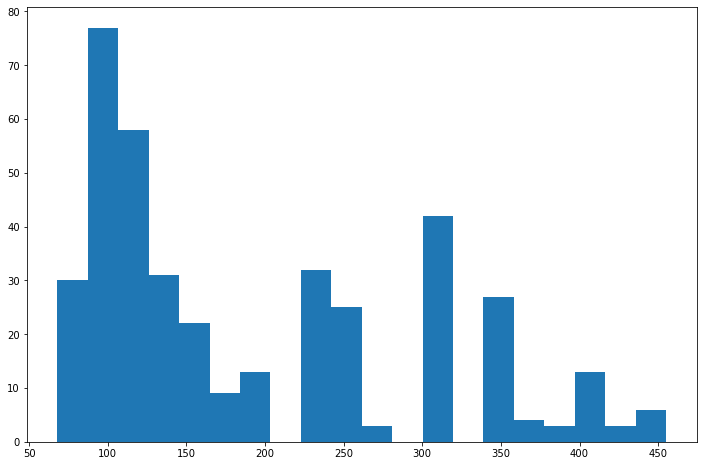

In [11]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.hist(df["Displacement"], bins=20)
plt.show()

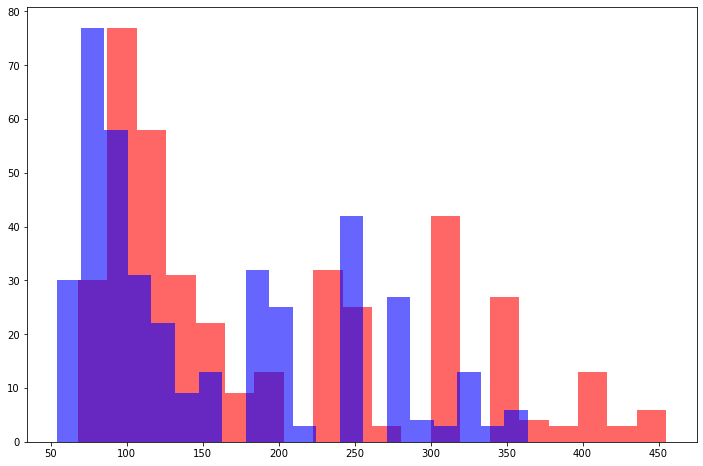

In [12]:
# 複数ヒストグラムを重ねる
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.hist(df["Displacement"], bins=20, color="r", alpha=0.6)
ax.hist(df["Displacement"] * 0.8, bins=20, color="b", alpha=0.6)
plt.show()

#### seaborn

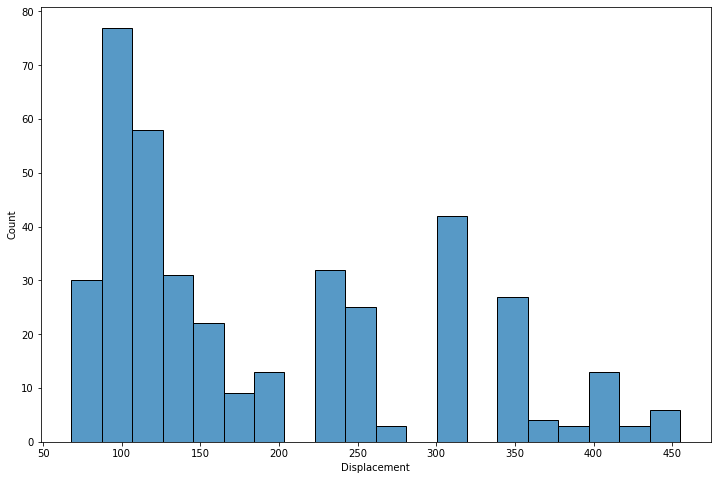

In [13]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax = sns.histplot(df["Displacement"], bins=20, kde=False)

## Basic Plots

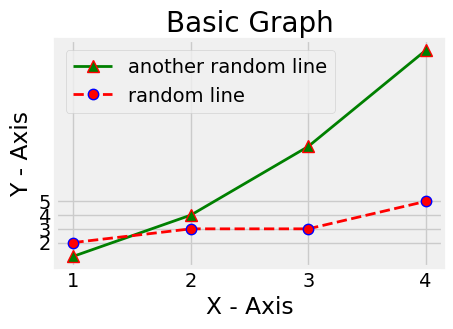

In [14]:
x = [1, 2, 3, 4]
y = [2, 3, 3, 5]
plt.figure(figsize=(5, 3), dpi=100)
plt.style.use("fivethirtyeight")
plt.title("Basic Graph", fontdict={"fontsize": 20})
plt.xlabel("X - Axis")
plt.ylabel("Y - Axis")
plt.xticks([0, 1, 2, 3, 4])
plt.yticks([2, 3, 4, 5])
plt.plot(
    np.arange(1, 5),
    np.arange(1, 5) ** 2,
    color="green",
    linewidth=2,
    marker="^",
    markeredgecolor="red",
    markersize=8,
    label="another random line",
)
plt.plot(
    x,
    y,
    label="random line",
    linewidth=2,
    color="red",
    marker=".",
    markersize=15,
    markeredgecolor="blue",
    linestyle="--",
)
plt.legend()

#### Bar Plot

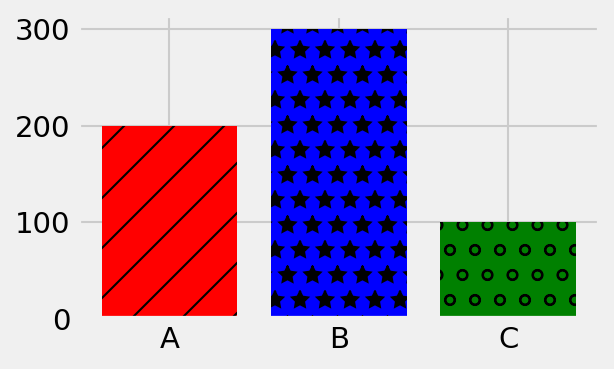

In [15]:
labels = ["A", "B", "C"]
values = [200, 300, 100]
plt.figure(figsize=(4, 2.5), dpi=150)
bars = plt.bar(labels, values, color=["red", "blue", "green"])
hatches = ["/", "*", "o"]
for bar in bars:
    bar.set_hatch(hatches.pop(0))

#### Scatter Plot

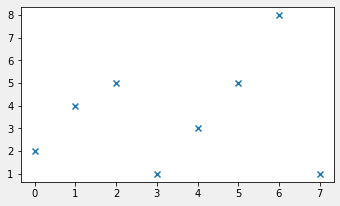

In [16]:
x = [0, 1, 2, 3, 4, 5, 6, 7]
y = [2, 4, 5, 1, 3, 5, 8, 1]
plt.figure(figsize=(5, 3))
plt.style.use("default")
plt.scatter(x, y, marker="x")

## SubPlots

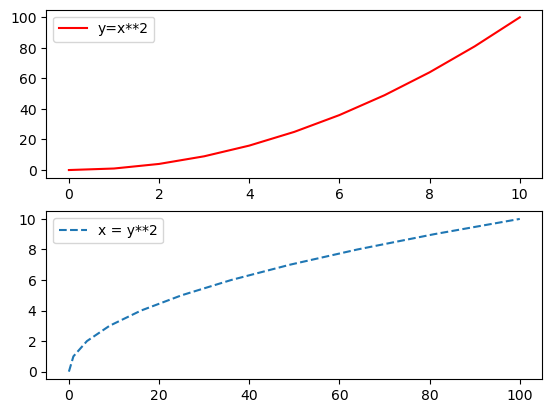

In [17]:
# basic subplots
x = np.arange(11)
y = x ** 2
plt.subplot(2, 1, 1)
plt.plot(x, y, color="red", label="y=x**2")
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(y, x, linestyle="--", label="x = y**2")
plt.legend()
plt.show()

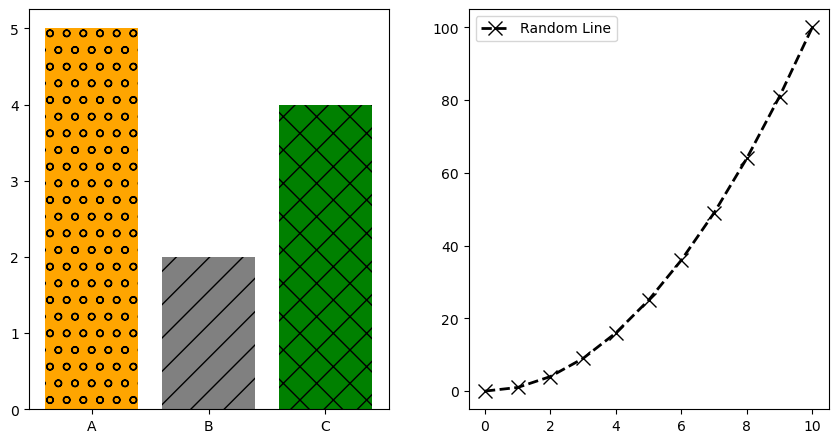

In [18]:
# object oriented approach
fig = plt.figure(figsize=(8, 4))
# firs plot
ax1 = fig.add_axes([0.1, 0.1, 0.45, 1])
bars = ax1.bar(["A", "B", "C"], [5, 2, 4], color=["orange", "grey", "green"])
hatches = ["o", "/", "x"]
for bar in bars:
    bar.set_hatch(hatches.pop(0))

# second plot
ax2 = fig.add_axes([0.65, 0.1, 0.45, 1])
ax2.plot(
    x,
    y,
    linewidth=2,
    linestyle="--",
    color="black",
    marker="x",
    markersize="10",
    label="Random Line",
)
ax2.legend()

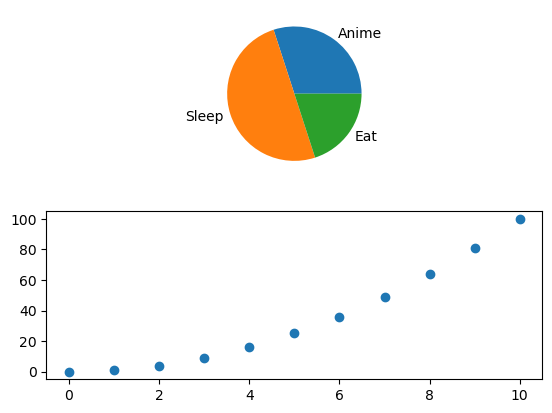

In [19]:
# default way
fig, axes = plt.subplots(2, 1)
axes[0].pie(x=[30, 50, 20], labels=["Anime", "Sleep", "Eat"])
axes[1].scatter(x, y)
plt.show()

### Histogram Plot

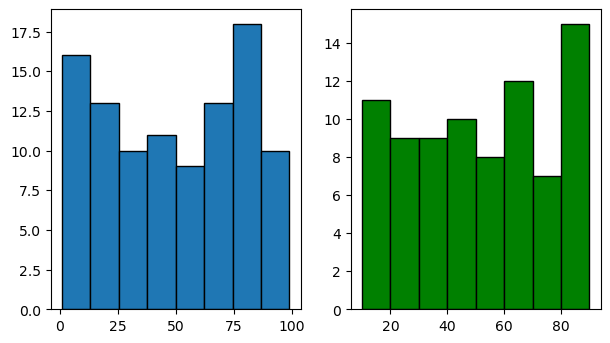

In [20]:
x = np.random.randint(1, 101, size=100)

fig = plt.figure(figsize=(5, 3), dpi=100)

# first plot
ax1 = fig.add_axes([0, 0, 0.5, 1])
ax1.hist(x, bins=8, edgecolor="black")

# second plot
ax2 = fig.add_axes([0.6, 0, 0.5, 1])
ax2.hist(x, bins=[10, 20, 30, 40, 50, 60, 70, 80, 90], color="green", edgecolor="black")
plt.show()

### Box Plot

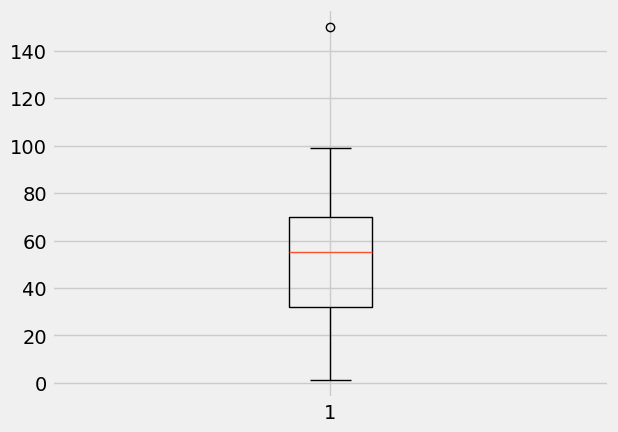

In [21]:
x = np.random.randint(1, 100, size=100)

x = np.append(x, 150)
plt.style.use("fivethirtyeight")
plt.boxplot(x)
plt.show()